<a href="https://colab.research.google.com/github/hewanshrestha/ML_Algorithms/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In [41]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

In [5]:
# loading the dataset
digits = load_digits()

In [9]:
# printing the shape of the data
print("Image Data Shape: ", digits.data.shape)

Image Data Shape:  (1797, 64)


In [10]:
# printing the shape of the target
print("Image Target Shape: ", digits.target.shape)

Image Target Shape:  (1797,)


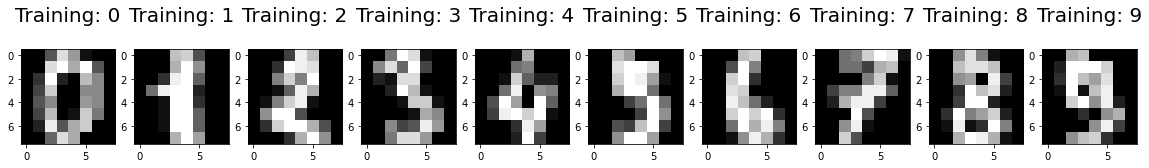

In [17]:
# plotting the samples
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [20]:
# splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [21]:
# creating the LogisticRegression model
model = LogisticRegression()

In [22]:
# training the model with training sets
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# predicting for one observation
model.predict(X_test[12].reshape(1,-1))

array([9])

In [32]:
# predicting for multiple observations
model.predict(X_test[:20])

array([0, 6, 9, 0, 8, 2, 7, 3, 7, 0, 2, 7, 9, 5, 0, 9, 6, 4, 4, 4])

In [39]:
# making predictions on the entire testing set
predictions = model.predict(X_test)
predictions

array([0, 6, 9, 0, 8, 2, 7, 3, 7, 0, 2, 7, 9, 5, 0, 9, 6, 4, 4, 4, 7, 1,
       9, 2, 5, 5, 3, 7, 0, 9, 7, 5, 2, 8, 8, 4, 8, 7, 6, 2, 1, 6, 8, 5,
       9, 2, 3, 6, 2, 5, 5, 1, 4, 9, 5, 9, 6, 4, 2, 2, 0, 1, 0, 9, 6, 7,
       6, 8, 9, 5, 4, 1, 4, 1, 8, 9, 9, 5, 0, 0, 8, 8, 0, 8, 4, 3, 9, 8,
       0, 2, 3, 2, 7, 8, 5, 2, 6, 5, 2, 0, 6, 9, 8, 9, 5, 9, 1, 3, 5, 0,
       5, 8, 5, 2, 6, 8, 9, 5, 9, 7, 8, 5, 3, 1, 7, 6, 1, 6, 0, 5, 4, 3,
       8, 6, 6, 7, 6, 6, 2, 4, 2, 1, 8, 6, 9, 8, 0, 7, 9, 2, 8, 8, 3, 6,
       5, 8, 1, 4, 8, 1, 4, 7, 8, 9, 2, 5, 9, 7, 0, 0, 4, 1, 0, 0, 9, 8,
       8, 8, 9, 1, 4, 7, 4, 2, 3, 1, 7, 1, 7, 0, 1, 2, 4, 3, 6, 4, 3, 6,
       7, 6, 5, 3, 5, 7, 9, 7, 5, 8, 1, 3, 0, 2, 5, 6, 8, 1, 7, 0, 3, 3,
       4, 8, 2, 3, 2, 0, 8, 9, 1, 7, 2, 7, 6, 4, 8, 4, 3, 2, 7, 0, 7, 2,
       6, 0, 2, 3, 8, 6, 8, 2, 4, 3, 7, 2, 3, 4, 0, 6, 7, 7, 1, 1, 7, 8,
       3, 2, 4, 1, 9, 0, 9, 9, 3, 0, 4, 6, 8, 1, 8, 9, 9, 9, 9, 2, 2, 1,
       4, 0, 7, 8, 0, 3, 1, 7, 2, 1, 9, 0, 2, 7, 4,

In [42]:
cm = metrics.confusion_matrix(y_test, predictions)

In [36]:
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
score

0.9583333333333334

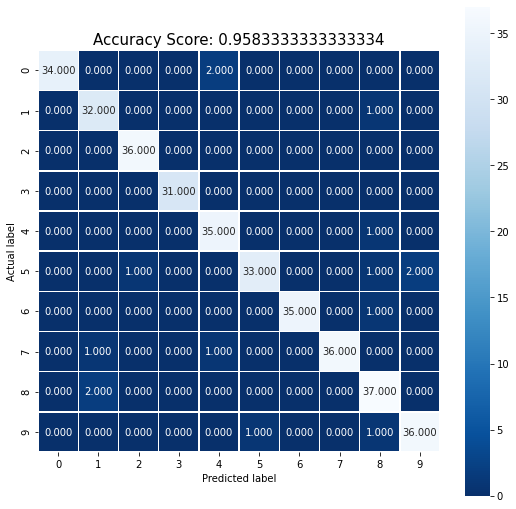

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);